In [1]:
 # Use the Heart Disease database:
 # • Apply Singular Value Decomposition (SVD) to analyze the decomposed features.
 # • Apply data visualization to the outcomes of SVD

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
data=pd.read_csv("C:/Users/HP/OneDrive/Desktop/ml 7th sem codes/datasets/heart.csv")
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
features = data.drop(columns=['target'])
target = data['target']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

svd = TruncatedSVD(n_components=5, random_state=42)
svd_features = svd.fit_transform(scaled_features)
explained_variance = svd.explained_variance_ratio_
svd_features_df = pd.DataFrame(svd_features, columns=[f'SVD_Component_{i+1}' for i in range(svd_features.shape[1])])
explained_variance, svd_features_df.head()


(array([0.21254053, 0.11820708, 0.09406418, 0.09085735, 0.07861281]),
    SVD_Component_1  SVD_Component_2  SVD_Component_3  SVD_Component_4  \
 0         0.624111         2.321270         2.474673         2.676239   
 1        -0.455988        -0.957351         1.139595         2.426838   
 2        -1.828805         0.042885        -0.452229         0.406415   
 3        -1.716006        -0.495337         0.030631        -0.112162   
 4        -0.371356         0.301156        -2.841069        -0.809042   
 
    SVD_Component_5  
 0         0.375253  
 1         2.273767  
 2         0.867802  
 3        -0.235598  
 4         0.011389  )

Text(0.5, 1.0, 'Singular Values of Components')

<Figure size 1200x500 with 0 Axes>

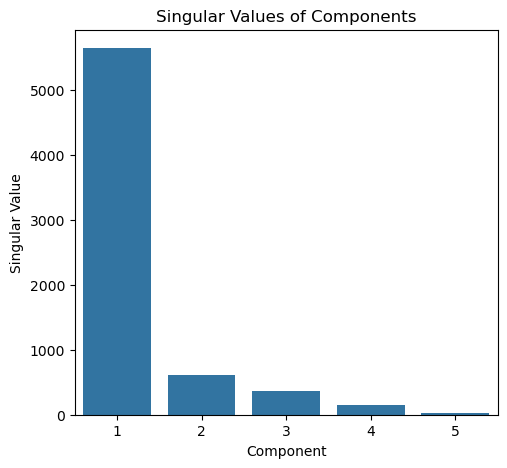

In [7]:
svd = TruncatedSVD(n_components=5)

svd.fit(features)

singular_values = svd.singular_values_

plt.figure(figsize=(12, 5))


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(1, len(singular_values) + 1), y=singular_values)
plt.xlabel('Component')
plt.ylabel('Singular Value')
plt.title('Singular Values of Components')




Text(0.5, 1.0, 'Explained Variance Ratio of Components')

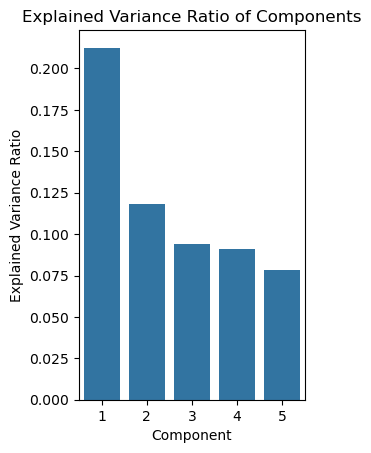

In [8]:
plt.subplot(1, 2, 2)
sns.barplot(x=np.arange(1, len(explained_variance) + 1), y=explained_variance)
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Components')



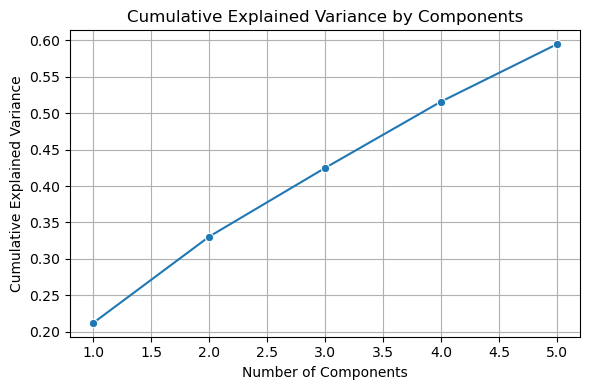

In [10]:
cumulative_explained_ratios = np.cumsum(explained_variance)
plt.figure(figsize=(6, 4))
sns.lineplot(x=np.arange(1, len(cumulative_explained_ratios) + 1),
             y=cumulative_explained_ratios, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Components')
plt.grid(True)

plt.tight_layout()
plt.show()


In [11]:
correlations = pd.DataFrame(np.dot(scaled_features.T, svd_features) / (len(scaled_features) - 1),
                            index=features.columns,
                            columns=[f'SVD_Component_{i+1}' for i in range(svd_features.shape[1])])

correlations


,SVD_Component_1,SVD_Component_2,SVD_Component_3,SVD_Component_4,SVD_Component_5
age,0.871025,0.626192,-0.115421,-0.024485,-0.314940
sex,0.251818,-0.582472,0.680735,-0.302555,0.051990
cp,-0.761260,0.458319,0.437966,0.341178,0.167316
trestbps,0.509859,0.675588,0.250099,0.026783,0.192907
chol,0.325384,0.562001,-0.500354,-0.406960,0.328181
fbs,0.204143,0.489412,0.591034,-0.081301,-0.239360
restecg,-0.354084,-0.340551,-0.109427,0.315338,-0.403647
thalach,-1.154606,0.120068,0.194161,-0.218199,0.331480
exang,1.001497,-0.405670,-0.155024,-0.136348,0.035411
oldpeak,1.163313,-0.080566,0.135378,0.386679,0.256932


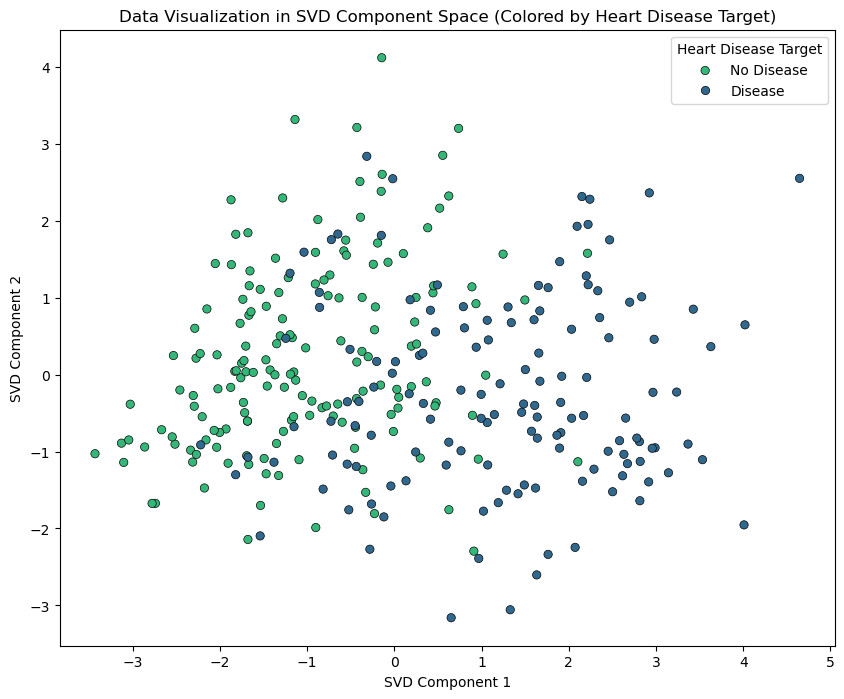

In [12]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=svd_features[:, 0], y=svd_features[:, 1], hue=target, palette="viridis", edgecolor='k')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.title('Data Visualization in SVD Component Space (Colored by Heart Disease Target)')
plt.legend(title="Heart Disease Target", labels=['No Disease', 'Disease'])
plt.show()	


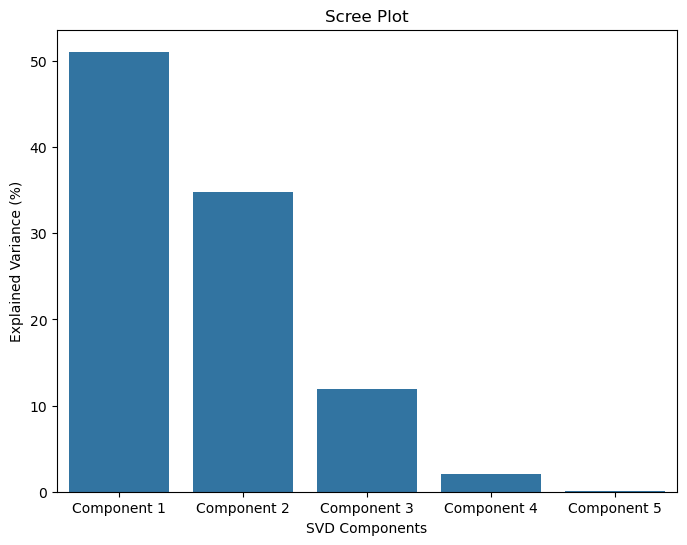

In [13]:
explained_variance = svd.explained_variance_ratio_
plt.figure(figsize=(8,6))
sns.barplot(x=[f'Component {i+1}' for i in range(len(explained_variance))],
            y=explained_variance * 100)
plt.ylabel('Explained Variance (%)')
plt.xlabel('SVD Components')
plt.title('Scree Plot')
plt.show()


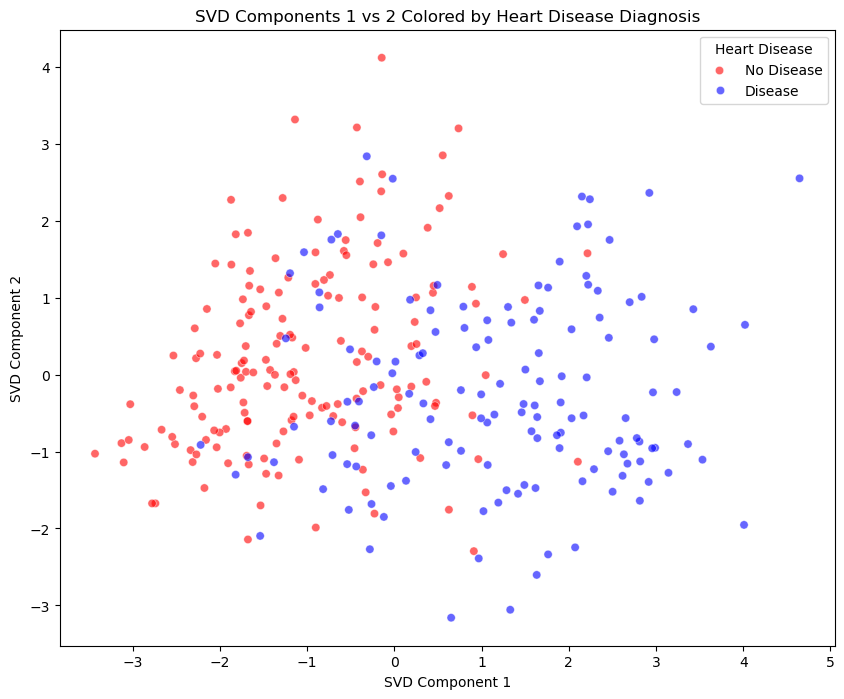

In [14]:
svd_plot_df = svd_features_df.copy()
svd_plot_df['target'] = target
plt.figure(figsize=(10,8))
sns.scatterplot(data=svd_plot_df,
                x='SVD_Component_1',
                y='SVD_Component_2',
                hue='target',
                palette=['blue', 'red'],
                alpha=0.6)
plt.title('SVD Components 1 vs 2 Colored by Heart Disease Diagnosis')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()


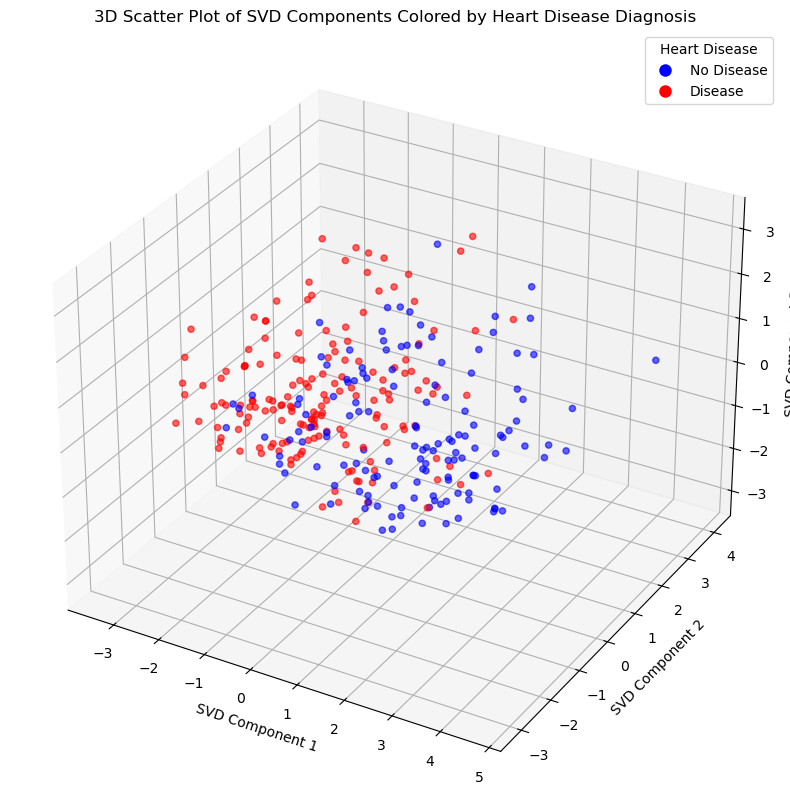

In [15]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

colors = svd_plot_df['target'].map({0: 'blue', 1: 'red'})

ax.scatter(svd_plot_df['SVD_Component_1'],
           svd_plot_df['SVD_Component_2'],
           svd_plot_df['SVD_Component_3'],
           c=colors, alpha=0.6)


ax.set_title('3D Scatter Plot of SVD Components Colored by Heart Disease Diagnosis')
ax.set_xlabel('SVD Component 1')
ax.set_ylabel('SVD Component 2')
ax.set_zlabel('SVD Component 3')

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='No Disease',
                          markerfacecolor='blue', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Disease',
                          markerfacecolor='red', markersize=10)]
ax.legend(handles=legend_elements, title='Heart Disease')

plt.show()


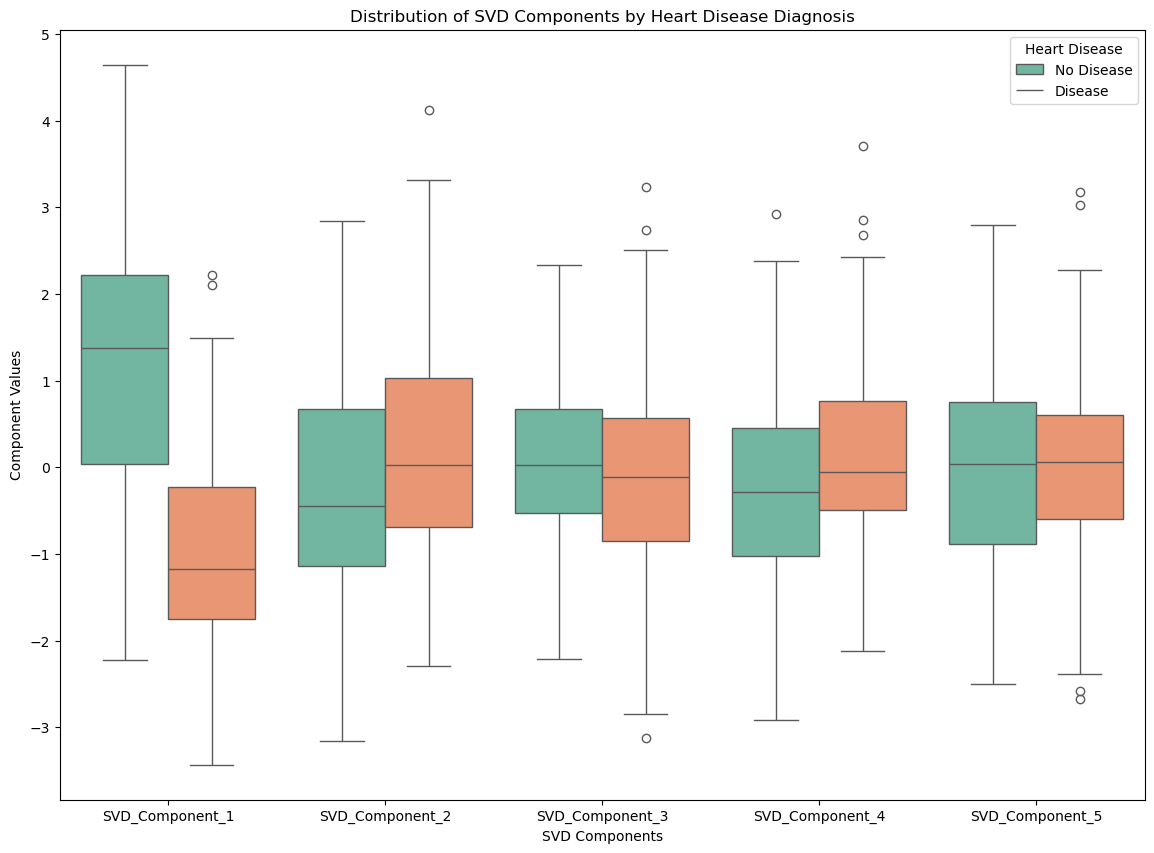

In [16]:
melted_df = svd_plot_df.melt(id_vars='target',
                             value_vars=[f'SVD_Component_{i+1}' for i in range(svd.n_components)], # Use svd.n_components
                             var_name='SVD_Component',
                             value_name='Value')
plt.figure(figsize=(14,10))
sns.boxplot(x='SVD_Component', y='Value', hue='target', data=melted_df, palette='Set2')
plt.title('Distribution of SVD Components by Heart Disease Diagnosis')
plt.xlabel('SVD Components')
plt.ylabel('Component Values')
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()


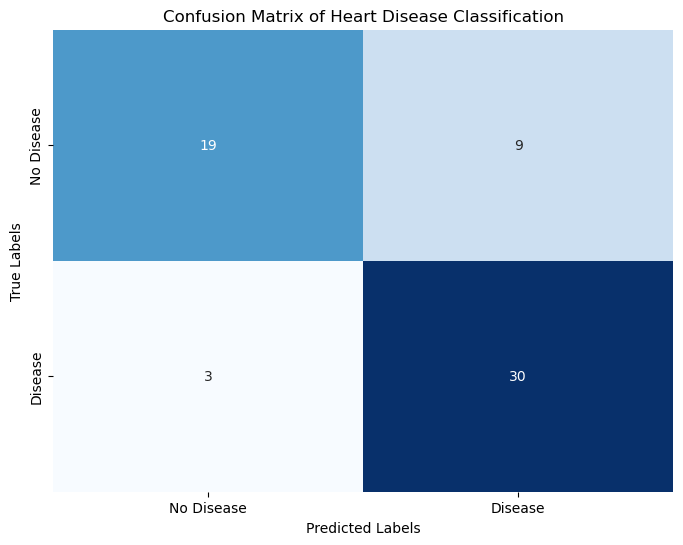

In [17]:
X_train, X_test, y_train, y_test = train_test_split(svd_features_df, target,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=target)

# Initialize and train the model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Disease", "Disease"],
            yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of Heart Disease Classification")
plt.show()


In [18]:
report = classification_report(y_test, y_pred, target_names=["No Disease", "Disease"], output_dict=True)

report_df = pd.DataFrame(report).transpose()

report_df = report_df.round(2)

report_df = report_df.rename(columns={
    "precision": "Precision",
    "recall": "Recall",
    "f1-score": "F1-Score",
    "support": "Support"
})
print("Classification Report:")
print(report_df)
print(f"\nOverall Accuracy:{accuracy_score(y_test, y_pred):.2f}")


Classification Report:
              Precision  Recall  F1-Score  Support
No Disease         0.86    0.68      0.76     28.0
Disease            0.77    0.91      0.83     33.0
accuracy           0.80    0.80      0.80      0.8
macro avg          0.82    0.79      0.80     61.0
weighted avg       0.81    0.80      0.80     61.0

Overall Accuracy:0.80
